In [1]:
using JLD
using Multilane
using POMDPs
using MCTS
using DataFrames
using DataFramesMeta

In [2]:
results = load("../data/random_periods.jld")
@where(results["stats"], :time_to_lane .== 138.0)

,id,uuid,solver_key,problem_key,initial_key,rng_seed,time,reward,brake_thresh,lambda,nb_brakes,steps_to_lane,time_to_lane,steps_in_lane,steps,crash,vel_sigma
1,30,75896167318929652242737391457942643866,random,eUvEUsEg,wbNTilaR,30,1.470100137713681e9,-1490.0,2.5,10.0,15,184,138.0,1,184,false,0.0
2,58,166519622417990557558031317867226002442,random,eUvEUsEg,ZDx1juRZ,58,1.470100137713681e9,-1390.0,2.5,10.0,14,184,138.0,1,184,false,0.0
3,80,226898399823970017215985797242408123763,random,eUvEUsEg,Zf7ocg5z,80,1.470100137713681e9,-1790.0,2.5,10.0,18,184,138.0,1,184,false,0.0
4,105,221140434010781105279085408653248446710,random,eUvEUsEg,jkirtfFl,105,1.470100137713681e9,-90.0,2.5,10.0,1,184,138.0,1,184,false,0.0
5,109,184962696308132062911375789615519550408,random,eUvEUsEg,vz4l0LxC,109,1.470100137713681e9,-190.0,2.5,10.0,2,184,138.0,1,184,false,0.0
6,166,196702660038312521371069159508607690139,random,eUvEUsEg,Foeuf7MQ,166,1.470100137713681e9,-390.0,2.5,10.0,4,184,138.0,1,184,false,0.0
7,167,200707299143638027520374486980016957639,random,eUvEUsEg,h2YMs3Zg,167,1.470100137713681e9,-790.0,2.5,10.0,8,184,138.0,1,184,false,0.0
8,195,19834215454004599175571913048724810998,random,eUvEUsEg,AiKD9RA0,195,1.470100137713681e9,-90.0,2.5,10.0,1,184,138.0,1,184,false,0.0
9,203,219109791300834461530588226739209201613,random,eUvEUsEg,TIHfwu3z,203,1.470100137713681e9,-590.0,2.5,10.0,6,184,138.0,1,184,false,0.0
10,223,146600244616735854469414735306745156858,random,eUvEUsEg,Q4OlmUUy,223,1.470100137713681e9,-1990.0,2.5,10.0,20,184,138.0,1,184,false,0.0


In [3]:
problem, sim, policy = rerun(results, 30);

Interact.Slider{Int64}(Signal{Int64}(92, nactions=0),"i",92,1:184,"d",true)

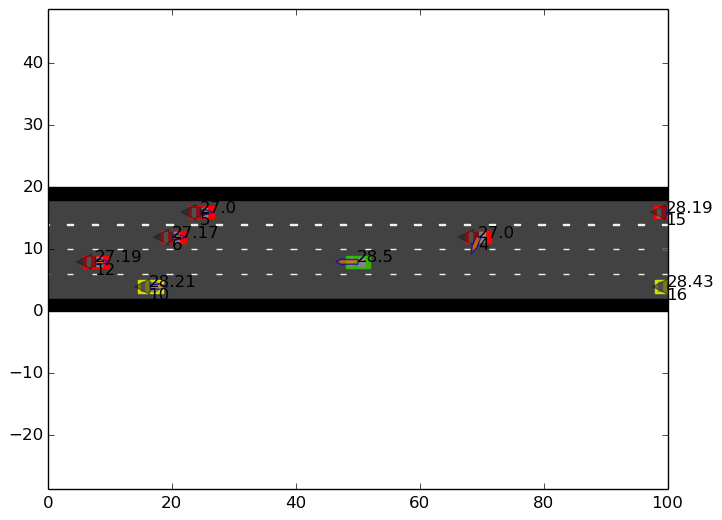

In [4]:
display_sim(problem, sim)
# filename = write_tmp_gif(problem, sim)
# run(`gifview $filename`)

In [5]:
step = 1

1

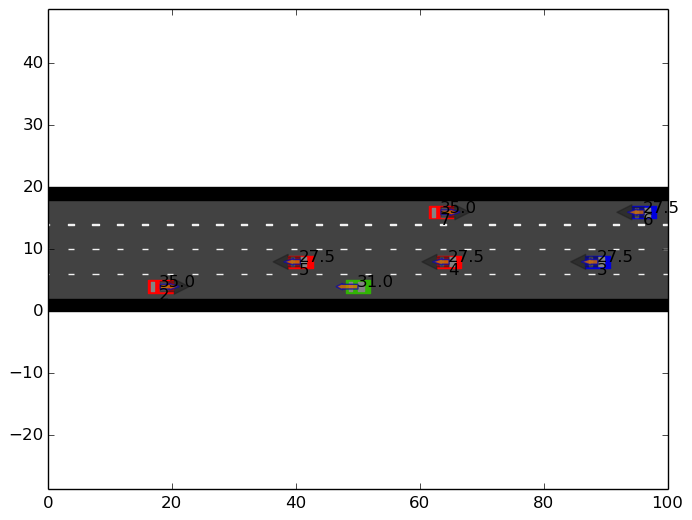

In [6]:
visualize(problem, sim.state_hist[step], sim.action_hist[step], sim.state_hist[step+1]);